# 1. Business Understanding

    1. Business Problem
        - Industri 4.0 need automation
        - Information accurate ETA is the most importance for customers
    2. Objectives: 
        - predict trip-duration 
    3. Criteria Succes : 
        - RMSLE as smallest posible

The evaluation metric for this competition is Root Mean Squared Logarithmic Error.

The RMSLE is calculated as

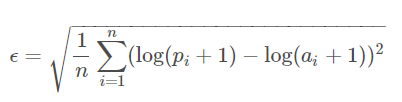


Where:

ϵ: is the RMSLE value (score)

n: is the total number of observations in the (public/private) data set,

pi: is your prediction of trip duration, and 

ai: is the actual trip duration for i. 

log(x): is the natural logarithm of x

    4. Advantage modelling
        - increase production
        - increase satisfaction
        - increase loyality

# 2. Data Understanding

In [352]:
#Let's check the preps, food check Beer check venue check!!
import os
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from matplotlib import cm
pd.set_option('display.max_columns', 50)

import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np

from haversine import haversine
from scipy.spatial.distance import euclidean , cityblock
from geopy.distance import great_circle
from math import *


import folium 
from folium import plugins
from folium.plugins import HeatMap

output_notebook()

Loading BokehJS ...

In [439]:
os.chdir('../OJT Bluebird/latihan') #your path
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

# Head Data

In [354]:
train.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [355]:
test.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N


# Shape data

In [356]:
print('train shape',train.shape)
print('test shape',test.shape)

train shape (1458644, 11)
test shape (625134, 9)


# Decribe

In [357]:
# Checking categorical
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [358]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


# Categorical/Object variables

In [359]:
num = train.describe().columns.tolist()
tr_col = train.columns.tolist()
cat = [i for i in tr_col if i not in num]
train[cat]

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,id2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,N
1,id2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,N
2,id3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,N
3,id3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,N
4,id2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,N
...,...,...,...,...
1458639,id2376096,2016-04-08 13:31:04,2016-04-08 13:44:02,N
1458640,id1049543,2016-01-10 07:35:15,2016-01-10 07:46:10,N
1458641,id2304944,2016-04-22 06:57:41,2016-04-22 07:10:25,N
1458642,id2714485,2016-01-05 15:56:26,2016-01-05 16:02:39,N


In [360]:
test.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N


In [426]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['month'] = train['pickup_datetime'].dt.month
train['weekofYear'] = train['pickup_datetime'].dt.weekofyear
train['dayofMonth'] = train['pickup_datetime'].dt.day
train['dayofWeek'] = train['pickup_datetime'].dt.dayofweek
train['hour'] = train['pickup_datetime'].dt.hour

test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['month'] = test['pickup_datetime'].dt.month
test['weekofYear'] = test['pickup_datetime'].dt.weekofyear
test['dayofMonth'] = test['pickup_datetime'].dt.day
test['dayofWeek'] = test['pickup_datetime'].dt.dayofweek
test['hour'] = test['pickup_datetime'].dt.hour

In [362]:
nums = test.describe().columns.tolist()
tr_cols = test.columns.tolist()
cats = [i for i in tr_cols if i not in nums]
test[cats]

,id,pickup_datetime,store_and_fwd_flag
0,id3004672,2016-06-30 23:59:58,N
1,id3505355,2016-06-30 23:59:53,N
2,id1217141,2016-06-30 23:59:47,N
3,id2150126,2016-06-30 23:59:41,N
4,id1598245,2016-06-30 23:59:33,N
...,...,...,...
625129,id3008929,2016-01-01 00:02:52,N
625130,id3700764,2016-01-01 00:01:52,N
625131,id2568735,2016-01-01 00:01:24,N
625132,id1384355,2016-01-01 00:00:28,N


In [440]:
# Distance
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)    
    
train.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

# Distribution

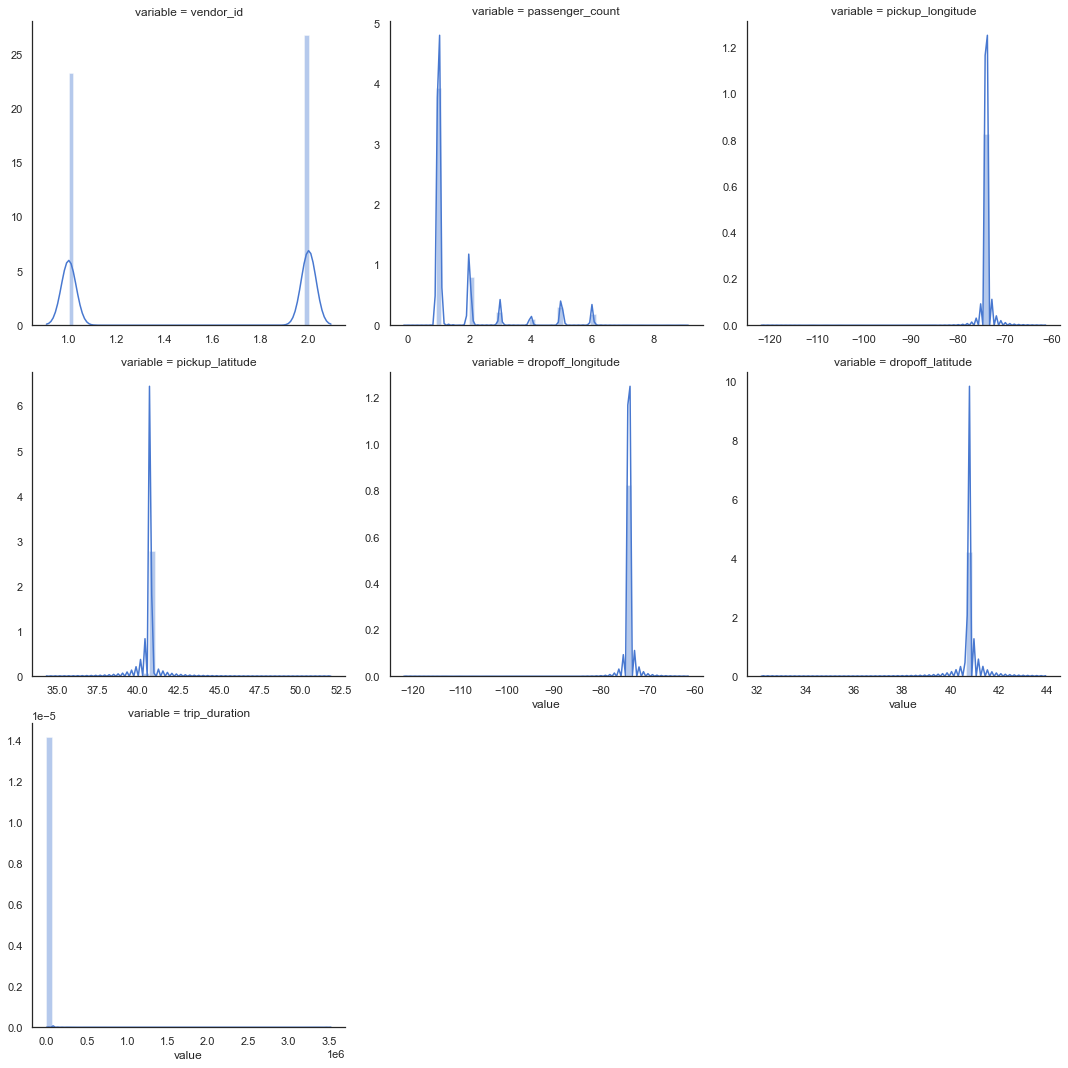

In [364]:
numeric = train[num]
f = pd.melt(numeric, value_vars=numeric)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.distplot, "value")
plt.show()
import warnings
warnings.filterwarnings('ignore')
g.savefig('distplot.png')

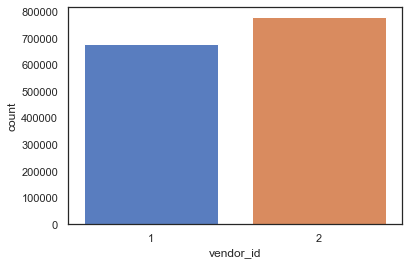

In [365]:
sns.countplot(train.vendor_id)

 # Outliers

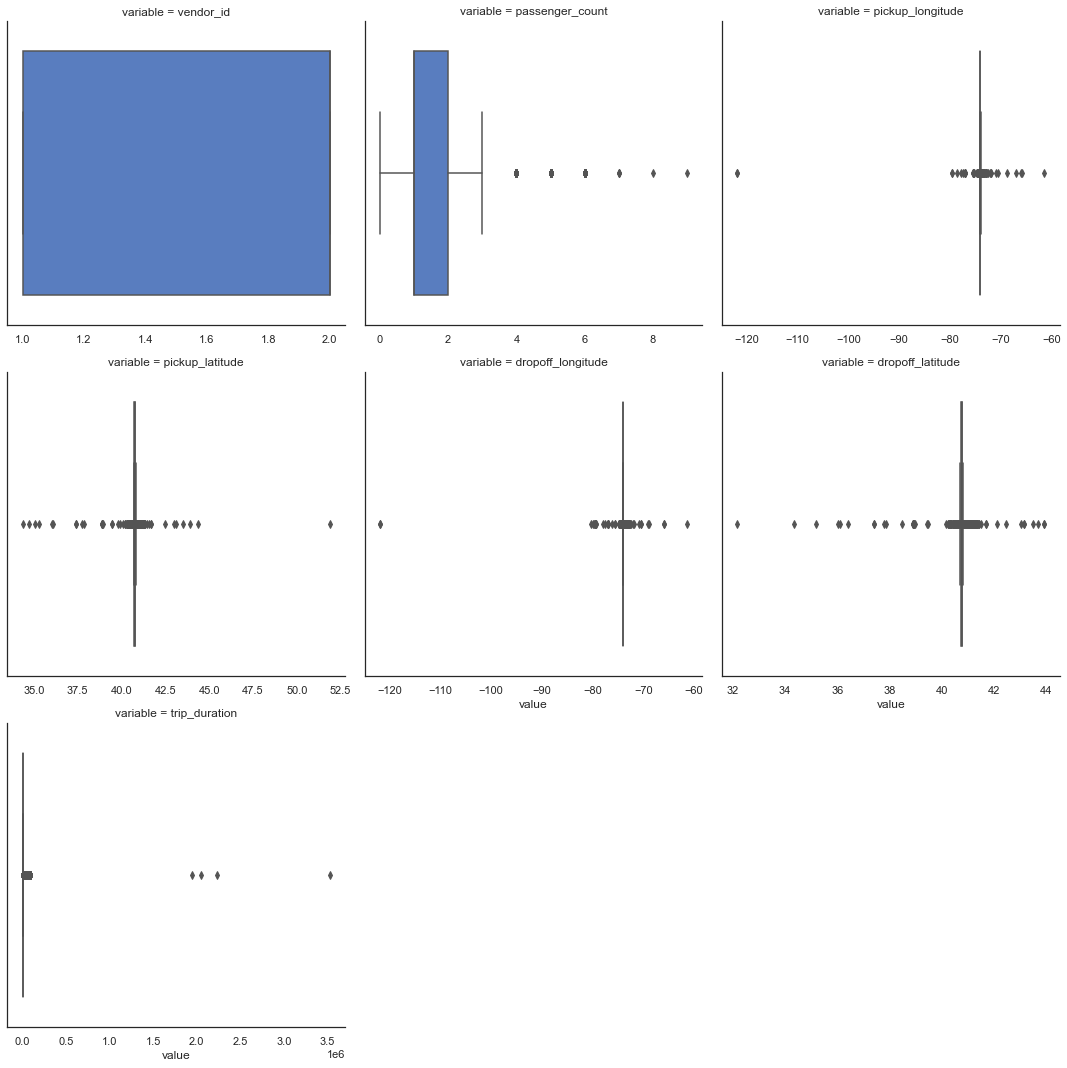

In [366]:
numeric = train[num]
f = pd.melt(numeric, value_vars=numeric)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.boxplot, "value")
plt.show()
import warnings
warnings.filterwarnings('ignore')
g.savefig('box1.png')

# Data Added

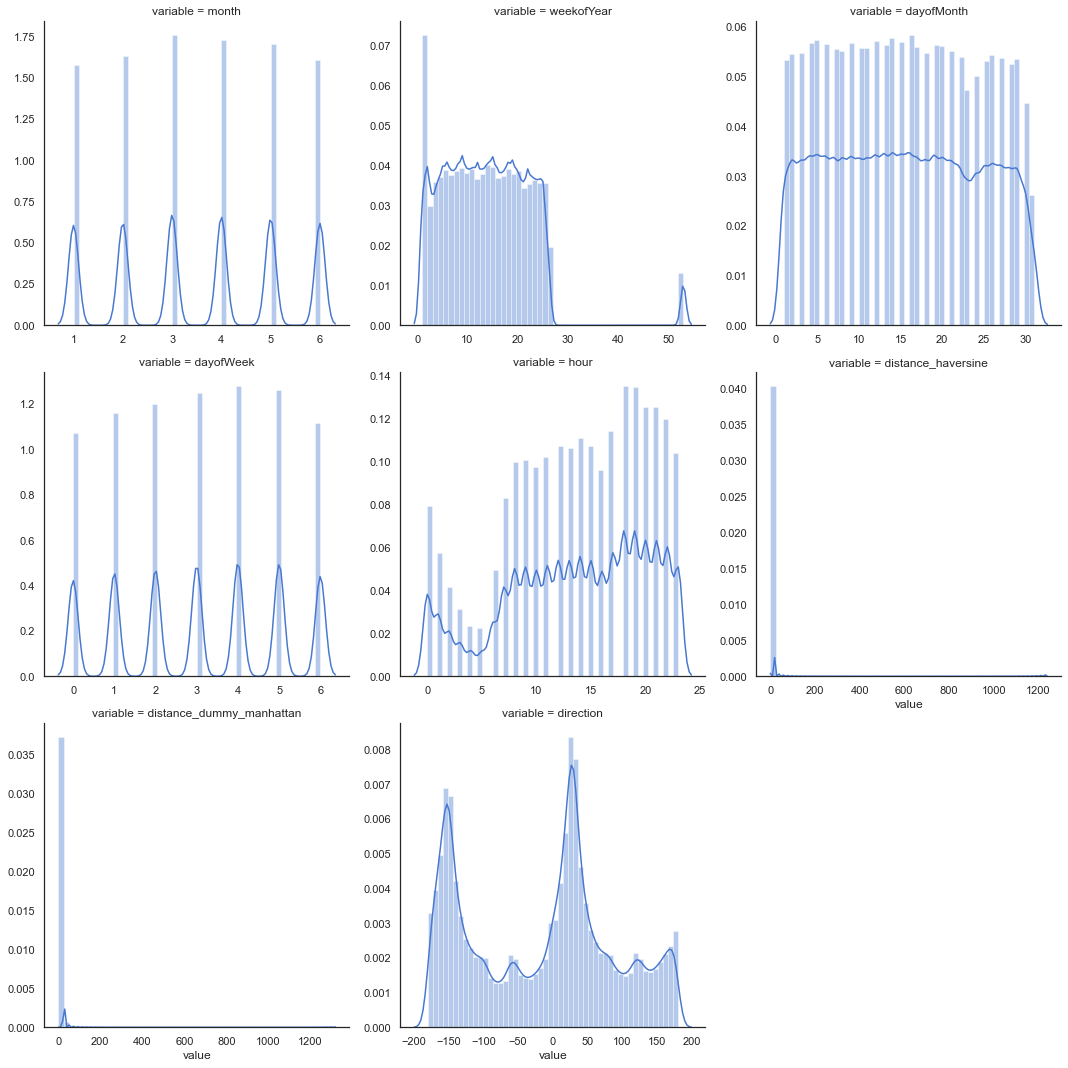

In [367]:
add = ['month','weekofYear','dayofMonth','dayofWeek','hour','distance_haversine','distance_dummy_manhattan','direction']
train[add]
numeric = train[add]
f = pd.melt(numeric, value_vars=numeric)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.distplot, "value")
plt.show()
import warnings
warnings.filterwarnings('ignore')
g.savefig('distplot.png')

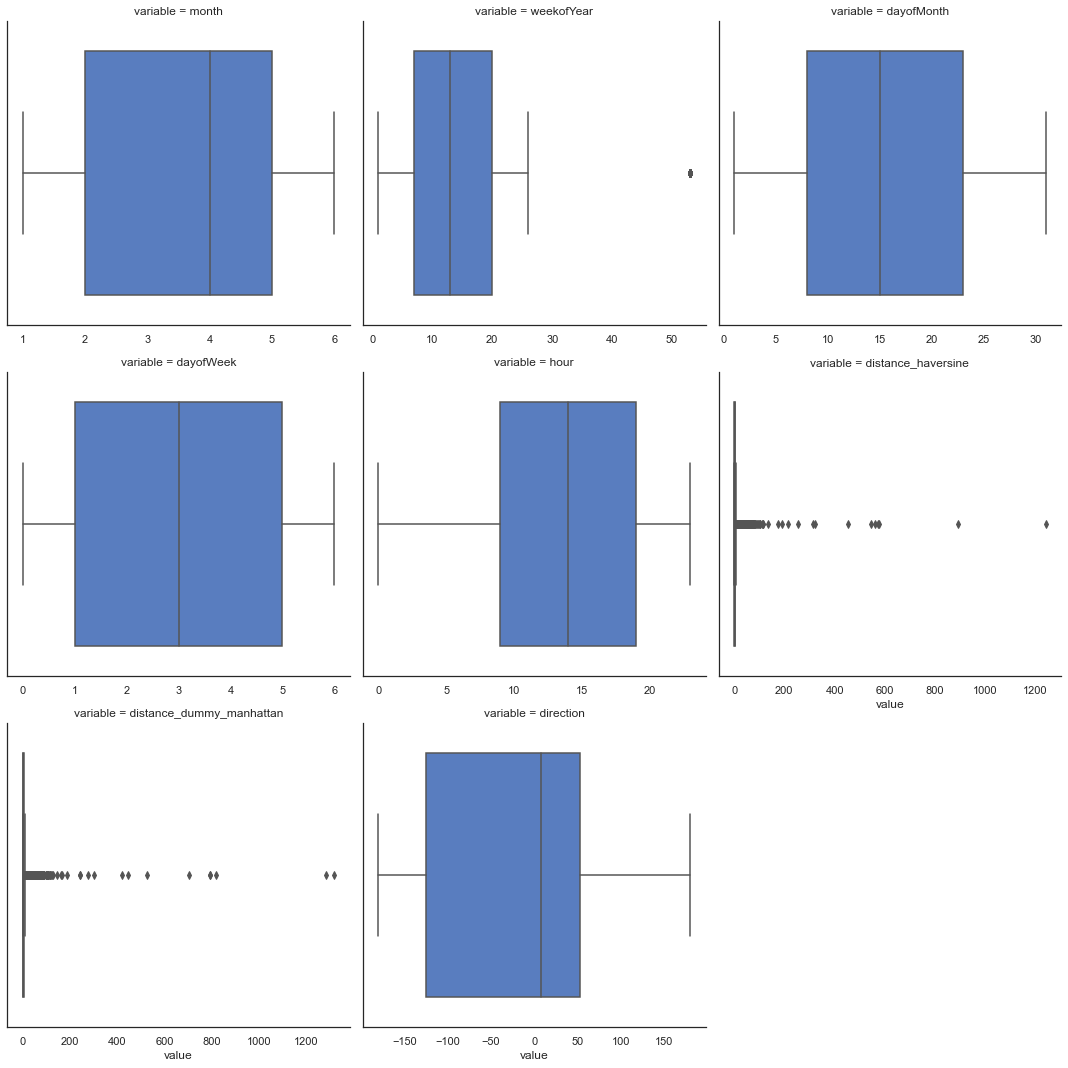

In [368]:
add = ['month','weekofYear','dayofMonth','dayofWeek','hour','distance_haversine','distance_dummy_manhattan','direction']
train[add]
numeric = train[add]
f = pd.melt(numeric, value_vars=numeric)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.boxplot, "value")
plt.show()
import warnings
warnings.filterwarnings('ignore')
g.savefig('distplot.png')

# 3. Data Preparation

# Checking NaN Values

In [369]:
train.isnull().sum()

id                          0
vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
trip_duration               0
month                       0
weekofYear                  0
dayofMonth                  0
dayofWeek                   0
hour                        0
distance_haversine          0
distance_dummy_manhattan    0
direction                   0
dtype: int64

In [370]:
test.isnull().sum()

id                          0
vendor_id                   0
pickup_datetime             0
passenger_count             0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
store_and_fwd_flag          0
month                       0
weekofYear                  0
dayofMonth                  0
dayofWeek                   0
hour                        0
distance_haversine          0
distance_dummy_manhattan    0
direction                   0
dtype: int64

In [371]:
train.skew()

vendor_id                    -0.140144
passenger_count               2.128094
pickup_longitude           -418.120385
pickup_latitude               5.489127
dropoff_longitude          -425.331724
dropoff_latitude            -20.671187
trip_duration               343.163944
month                        -0.014741
weekofYear                    1.180530
dayofMonth                    0.040419
dayofWeek                    -0.043088
hour                         -0.444584
distance_haversine           32.630981
distance_dummy_manhattan     27.412275
direction                     0.017743
dtype: float64

In [372]:
test.skew()

vendor_id                    -0.139876
passenger_count               2.134933
pickup_longitude           -446.621918
pickup_latitude              -8.366961
dropoff_longitude          -461.460427
dropoff_latitude             13.579477
month                        -0.018578
weekofYear                    1.181996
dayofMonth                    0.040622
dayofWeek                    -0.041451
hour                         -0.445644
distance_haversine           31.300723
distance_dummy_manhattan     34.964662
direction                     0.016545
dtype: float64

In [442]:
# handling Skew
from scipy.stats import boxcox
train['distance_haversine'] = np.log1p(train.distance_haversine)
train['distance_dummy_manhattan'] = np.log1p(train.distance_dummy_manhattan)

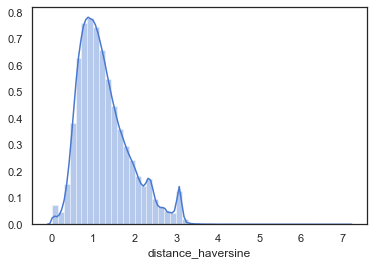

In [433]:
sns.distplot(train['distance_haversine'])

In [418]:
train['distance_haversine'].skew()

0.6527675572577911

In [374]:
train['passenger_count'] = np.log1p(train.passenger_count)

In [434]:
#handling outliers
def ub(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    return upper_bound
def lb(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    return lower_bound
# function cap
def cap(s):
    s = np.where(s > ub(s), s.mean(),s)
    s = np.where(s < lb(s), s.mean(),s)
    return s

# train['distance_dummy_manhattan'] = cap(train['distance_dummy_manhattan'])
# train['distance_haversine'] = cap(train['distance_dummy_manhattan'])

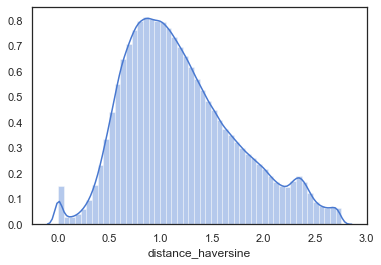

In [443]:
sns.distplot(train['distance_haversine'][train['distance_haversine'] <= ub(train['distance_haversine'])])

In [420]:
train['passenger_count'] = cap(train['passenger_count'])

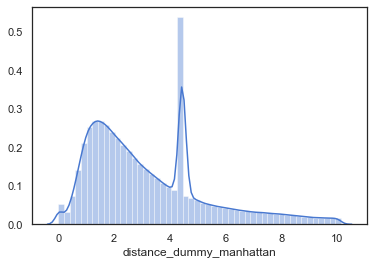

In [429]:
sns.distplot(train['distance_dummy_manhattan'])

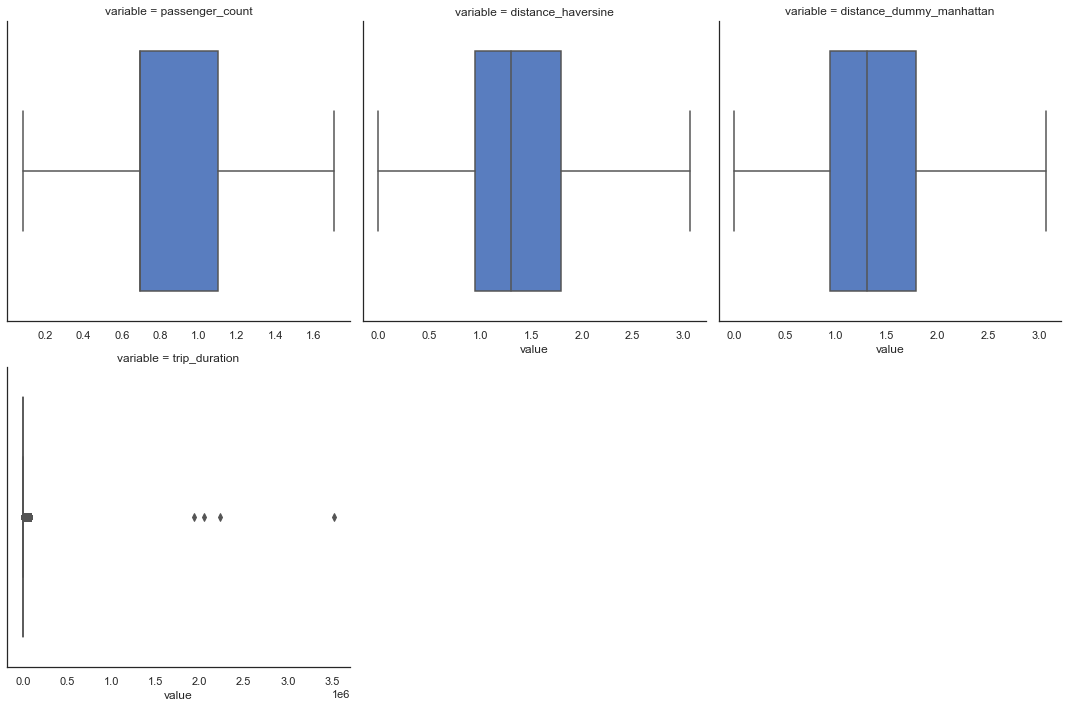

In [377]:
add = ['passenger_count','distance_haversine','distance_dummy_manhattan','trip_duration']
train[add]
numeric = train[add]
f = pd.melt(numeric, value_vars=numeric)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size = 5)
g = g.map(sns.boxplot, "value")
plt.show()
import warnings
warnings.filterwarnings('ignore')
g.savefig('distplot.png')

# Target Variable


 mu = 959.49 and sigma = 5237.43



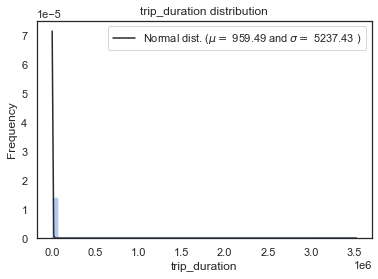

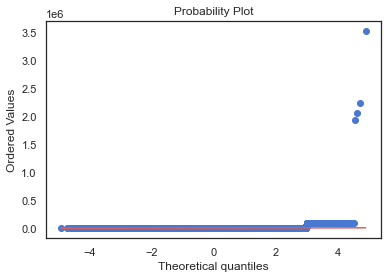

In [378]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(train['trip_duration'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['trip_duration'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('trip_duration distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['trip_duration'], plot=plt)
plt.show()


 mu = 6.47 and sigma = 0.80



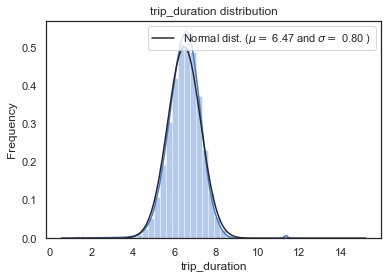

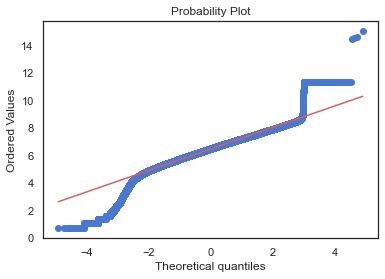

In [379]:

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["trip_duration"] = np.log1p(train["trip_duration"])

#Check the new distribution 
sns.distplot(train['trip_duration'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['trip_duration'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('trip_duration distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['trip_duration'], plot=plt)
plt.show()

Text(0.5, 1.0, 'trip_duration distribution before capping')

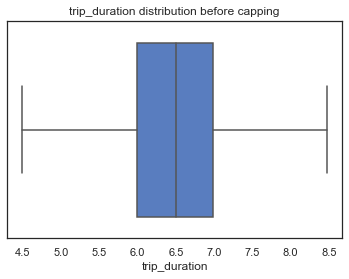

In [400]:
sns.boxplot(train.trip_duration)
plt.title('trip_duration distribution before capping')

Text(0.5, 1.0, 'trip_duration distribution after capping')

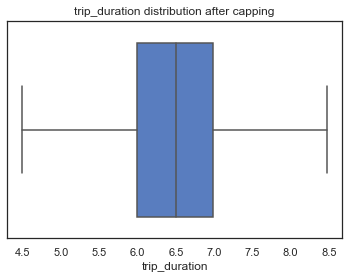

In [401]:
train['trip_duration'] = cap(train.trip_duration)
sns.boxplot(train.trip_duration)
plt.title('trip_duration distribution after capping')

# cultivate train


In [382]:
newyork_on_heatmap = folium.Map(location=[40.767937,-73.982155 ],tiles= "Stamen Terrain",
                    zoom_start = 13) 

# List comprehension to make out list of lists
heat_data = [[[row['dropoff_latitude'],row['dropoff_longitude']] 
                for index, row in heat_df[heat_df['Weight'] == i].iterrows()] 
                 for i in range(0,6)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(newyork_on_heatmap)

# Display the map
newyork_on_heatmap

In [383]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   id                        1458644 non-null  object        
 1   vendor_id                 1458644 non-null  int64         
 2   pickup_datetime           1458644 non-null  datetime64[ns]
 3   dropoff_datetime          1458644 non-null  object        
 4   passenger_count           1458644 non-null  float64       
 5   pickup_longitude          1458644 non-null  float64       
 6   pickup_latitude           1458644 non-null  float64       
 7   dropoff_longitude         1458644 non-null  float64       
 8   dropoff_latitude          1458644 non-null  float64       
 9   store_and_fwd_flag        1458644 non-null  object        
 10  trip_duration             1458644 non-null  float64       
 11  month                     1458644 non-null  int64 

In [384]:
train['store_and_fwd_flag'] = train.store_and_fwd_flag.astype('category').cat.codes

In [385]:
test['store_and_fwd_flag'] = test.store_and_fwd_flag.astype('category').cat.codes

In [386]:
train['pickup_datetime']= train['pickup_datetime'].values.tolist()
train['dropoff_datetime']= train['dropoff_datetime'].values.tolist()


In [387]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        625134 non-null  object        
 1   vendor_id                 625134 non-null  int64         
 2   pickup_datetime           625134 non-null  datetime64[ns]
 3   passenger_count           625134 non-null  int64         
 4   pickup_longitude          625134 non-null  float64       
 5   pickup_latitude           625134 non-null  float64       
 6   dropoff_longitude         625134 non-null  float64       
 7   dropoff_latitude          625134 non-null  float64       
 8   store_and_fwd_flag        625134 non-null  int8          
 9   month                     625134 non-null  int64         
 10  weekofYear                625134 non-null  int64         
 11  dayofMonth                625134 non-null  int64         
 12  da

In [388]:
test['pickup_datetime'] = test.pickup_datetime.values.tolist()

---

# MODELLING & EVALUATION

In [389]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# LightGBM Algorithm

In [407]:
x = train.drop(['id','trip_duration','dropoff_datetime'],axis=1)
y = train['trip_duration']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

lgb = LGBMRegressor()
lgb.fit(x_train, y_train)
pred_lgb = lgb.predict(x_test)


tra = cross_val_score(lgb, x_train, y_train, cv=5)
scores = cross_val_score(lgb, x_test, y_test, cv=5)

print('Score of train:',tra.mean())
print('Score of test:',scores.mean())
print('Score of MALE: {}'.format(mean_absolute_error(y_test,pred_lgb)))
print('Score of MSLE: {}'.format(mean_squared_error(y_test,pred_lgb)))
print('Score of RMSLE: {}'.format(np.sqrt(mean_squared_error(y_test, pred_lgb))))

(1166915, 16)
(291729, 16)
(1166915,)
(291729,)
Score of train: 0.7864932268176118
Score of test: 0.7854303813483392
Score of MALE: 0.24902295792149176
Score of MSLE: 0.11752520338717022
Score of RMSLE: 0.3428194909674335


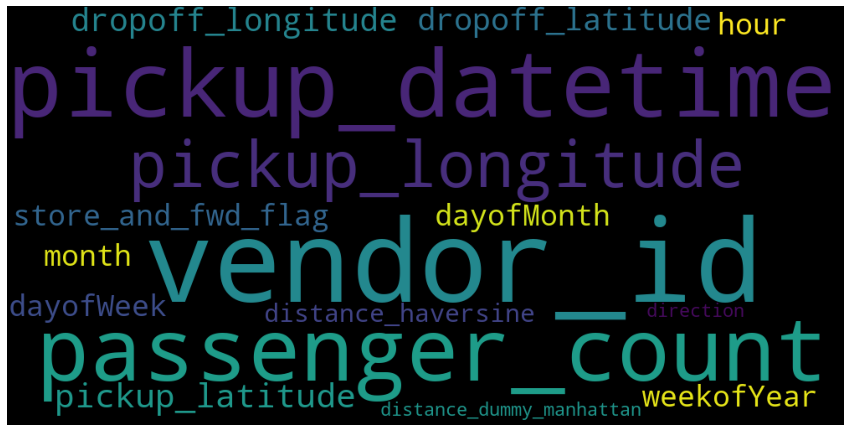

In [413]:

my_list = x.columns.tolist()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#convert list to string and generate
unique_string=(" ").join(my_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("all_feature.png", bbox_inches='tight')
plt.show()
plt.close()

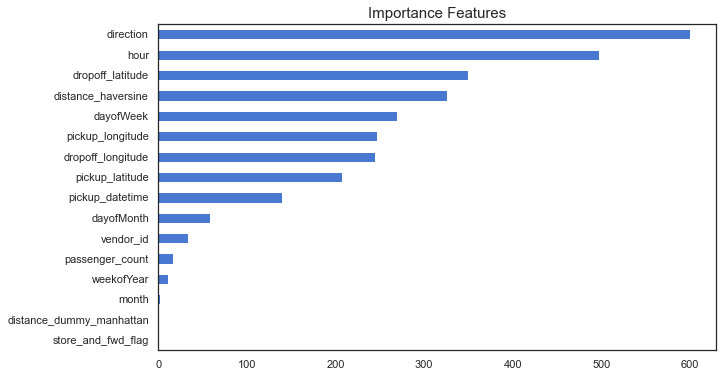

In [416]:
#Importance Feature
coef_lgb = pd.Series(lgb.feature_importances_, index=x.columns)
coef_lgb = coef_lgb.sort_values()
plt.figure(figsize=(10,6))
coef_lgb.plot(kind='barh')
plt.title('Importance Features',fontsize=15)
plt.show()

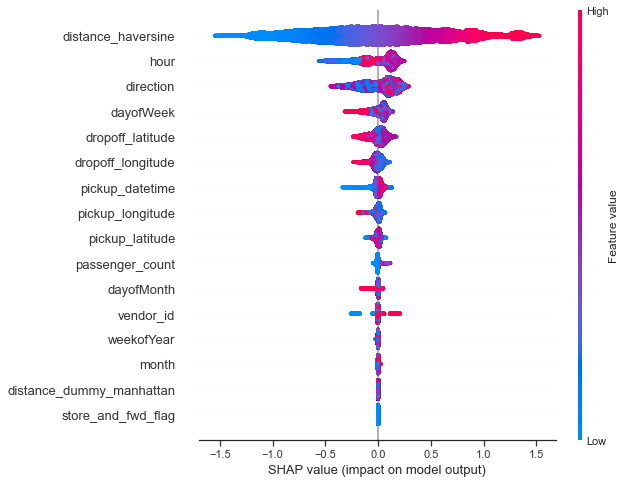

In [415]:
#Importance Feature by SHAP Values
import shap
shap_values = shap.TreeExplainer(lgb).shap_values(x_train)
shap.summary_plot(shap_values, x_train)

# CatBoost Modelling Algorithm

In [395]:
x = train.drop(['id','trip_duration','dropoff_datetime'],axis=1)
x.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,month,weekofYear,dayofMonth,dayofWeek,hour,distance_haversine,distance_dummy_manhattan,direction
0,2,1457976295000000000,0.693147,-73.982155,40.767937,-73.964630,40.765602,0,3,11,14,0,17,1.006290,1.006290,99.970196
1,1,1465692215000000000,0.693147,-73.980415,40.738564,-73.999481,40.731152,0,6,23,12,6,0,1.232708,1.232708,-117.153768
2,2,1453203324000000000,0.693147,-73.979027,40.763939,-74.005333,40.710087,0,1,3,19,1,11,2.219592,2.219592,-159.680165
3,2,1459971151000000000,0.693147,-74.010040,40.719971,-74.012268,40.706718,0,4,14,6,2,19,0.978826,0.978826,-172.737700
4,2,1458999055000000000,0.693147,-73.973053,40.793209,-73.972923,40.782520,0,3,12,26,5,13,0.788210,0.788210,179.473585


In [396]:
x = train.drop(['id','trip_duration','dropoff_datetime'],axis=1)
y = train['trip_duration']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

feat = [0,7]
cb = CatBoostRegressor(iterations=5000,logging_level='Silent',use_best_model=True,
                       early_stopping_rounds=500,eval_metric='RMSE')
cb.fit(x_train,y_train,cat_features=feat,plot=True,eval_set=(x_test,y_test))

(1166915, 16)
(291729, 16)
(1166915,)
(291729,)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [397]:
from sklearn.model_selection import cross_val_score 

pred_cb = cb.predict(x_test)
print('Score of Train: {}'.format(cb.score(x_train,y_train)))
print('Score of Test: {}'.format(cb.score(x_test,y_test)))
print('Score of MALE: {}'.format(mean_absolute_error(y_test,pred_cb)))
print('Score of MSLE: {}'.format(mean_squared_error(y_test,pred_cb)))
print('Score of RMSLE: {}'.format(np.sqrt(mean_squared_error(y_test, pred_cb))))

Score of Train: 0.8271992865837081
Score of Test: 0.817733386532736
Score of MALE: 0.22425604980967942
Score of MSLE: 0.100461191954901
Score of RMSLE: 0.3169561356953056


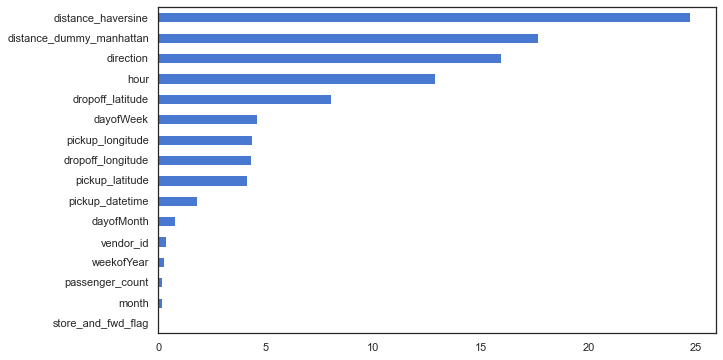

In [398]:
#Importance Feature
coef_cb = pd.Series(cb.get_feature_importance(), index=x.columns)
coef_cb = coef_cb.sort_values()
plt.figure(figsize=(10,6))
coef_cb.plot(kind='barh')

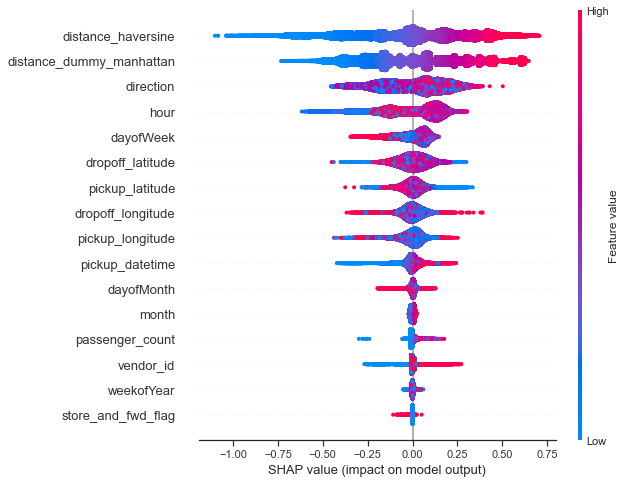

In [399]:
#Importance Feature by SHAP Values
shap_values = shap.TreeExplainer(cb).shap_values(x_test)
shap.summary_plot(shap_values, x_test)